In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [2]:
df = pd.read_csv(r'C:\\Users\prash\Desktop\SIEMENS\SIEMENS_proj_folder\Sentiment_Analysis_Webapp\data\sentiment_data\train.csv',delimiter=',', encoding='ISO-8859-1')
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola


In [3]:
df.shape

(27481, 6)

### EDA and Data Cleaning

In [ ]:
df.info()

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

textID           0
text             0
sentiment        0
Time of Tweet    0
Age of User      0
Country          0
dtype: int64

In [ ]:
df.shape

In [6]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country'],
      dtype='object')

In [7]:
#Now Let's drop the columns we don't need!
df.drop(['textID', 'Time of Tweet', 'Age of User',
       'Country'], axis=1, inplace=True)
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(27480, 2)

In [10]:
df.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [11]:
#The polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
def sentiment(x):
    if x == 'negative':
        return 0
    elif x== 'neutral':
        return 2
    else:
        return 4


In [12]:
df['sentiment_Label'] = df['sentiment'].apply(sentiment)

In [13]:
df

,text,sentiment,sentiment_Label
0,"I`d have responded, if I were going",neutral,2
1,Sooo SAD I will miss you here in San Diego!!!,negative,0
2,my boss is bullying me...,negative,0
3,what interview! leave me alone,negative,0
4,"Sons of ****, why couldn`t they put them on t...",negative,0
...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,0
27477,I`ve wondered about rake to. The client has ...,negative,0
27478,Yay good for both of you. Enjoy the break - y...,positive,4
27479,But it was worth it ****.,positive,4


In [14]:
df = df[['sentiment_Label','text']]

In [15]:
df

,sentiment_Label,text
0,2,"I`d have responded, if I were going"
1,0,Sooo SAD I will miss you here in San Diego!!!
2,0,my boss is bullying me...
3,0,what interview! leave me alone
4,0,"Sons of ****, why couldn`t they put them on t..."
...,...,...
27476,0,wish we could come see u on Denver husband l...
27477,0,I`ve wondered about rake to. The client has ...
27478,4,Yay good for both of you. Enjoy the break - y...
27479,4,But it was worth it ****.


In [16]:
#Simplifying the names of columns
df.columns = ['sentiment', 'text']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  27480 non-null  int64 
 1   text       27480 non-null  object
dtypes: int64(1), object(1)
memory usage: 644.1+ KB


In [18]:
df['sentiment'].value_counts()

sentiment
2    11117
4     8582
0     7781
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

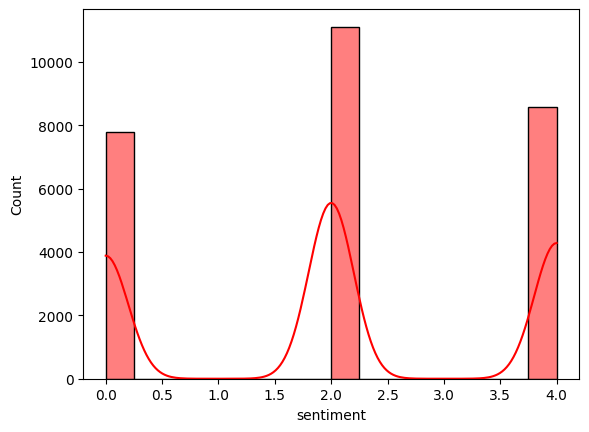

In [19]:
#Let's see some visuals
sns.histplot(df['sentiment'], kde=True, color = 'r')

<Axes: xlabel='sentiment', ylabel='count'>

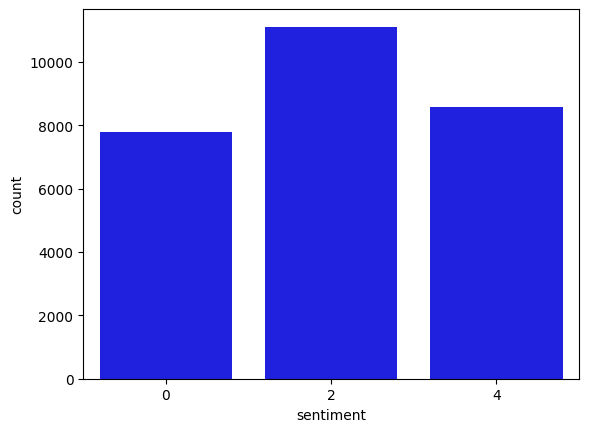

In [20]:
sns.countplot(x=df['sentiment'] , color= 'b')

### Text Preprocessing

In [ ]:
# stuff_to_be_removed = list(stopwords.words('english')) + list(punctuation)
# stemmer = LancasterStemmer()
# corpus = df['text'].tolist()
# print(len(corpus))
# print(corpus[0])

In [ ]:
# final_corpus = []
# final_corpus_joined = []
# for i in df.index:
#     text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
#     text = text.lower()
#     text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
#     text=re.sub("(\\d|\\W)+"," ",text)
#     text = text.split()
#     lem = SnowballStemmer("english")
#     text = [lem.stem(word) for word in text if not word in stuff_to_be_removed] 
#     text1 = " ".join(text)
#     final_corpus.append(text)
#     final_corpus_joined.append(text1)

In [ ]:
# data_cleaned = pd.DataFrame()
# data_cleaned["text"] = final_corpus_joined
# data_cleaned["sentiment"] = df["sentiment"].values

In [21]:

def preprocess_text(df):
    # Combine stopwords and punctuation
    stuff_to_be_removed = list(stopwords.words('english')) + list(punctuation)
    
    # Initialize lists to store processed text
    final_corpus = []
    final_corpus_joined = []
    
    for i in df.index:
        text = re.sub('[^a-zA-Z]', ' ', df['text'][i]) # Give the column name here
        text = text.lower()
        text = re.sub("</?.*?>", " <> ", text)
        text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
        text = re.sub("(\\d|\\W)+", " ", text)
        text = text.split()
        
        # Apply stemming and remove stopwords
        lem = SnowballStemmer("english")
        text = [lem.stem(word) for word in text if word not in stuff_to_be_removed]
        
        text1 = " ".join(text)
        final_corpus.append(text)
        final_corpus_joined.append(text1)
    
    # Create a cleaned DataFrame
    data_cleaned = pd.DataFrame()
    data_cleaned["text"] = final_corpus_joined
    data_cleaned["sentiment"] = df["sentiment"].values
    
    return data_cleaned,final_corpus




In [22]:
# Example usage:
data_cleaned, final_corpus = preprocess_text(df)

In [23]:
data_cleaned

,text,sentiment
0,respond go,2
1,sooo sad miss san diego,0
2,boss bulli,0
3,interview leav alon,0
4,son put releas alreadi bought,0
...,...,...
27475,wish could come see u denver husband lost job ...,0
27476,wonder rake client made clear net forc dev lea...,0
27477,yay good enjoy break probabl need hectic weeke...,4
27478,worth,4


In [24]:
#This df is created for wordcloud only
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df['sentiment'].values
data_eda.head()

,text,sentiment
0,"[respond, go]",2
1,"[sooo, sad, miss, san, diego]",0
2,"[boss, bulli]",0
3,"[interview, leav, alon]",0
4,"[son, put, releas, alreadi, bought]",0


### Word Cloud

In [25]:
positive = data_eda[data_eda['sentiment'] == 4]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['text'].tolist()

In [26]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

### For Positives

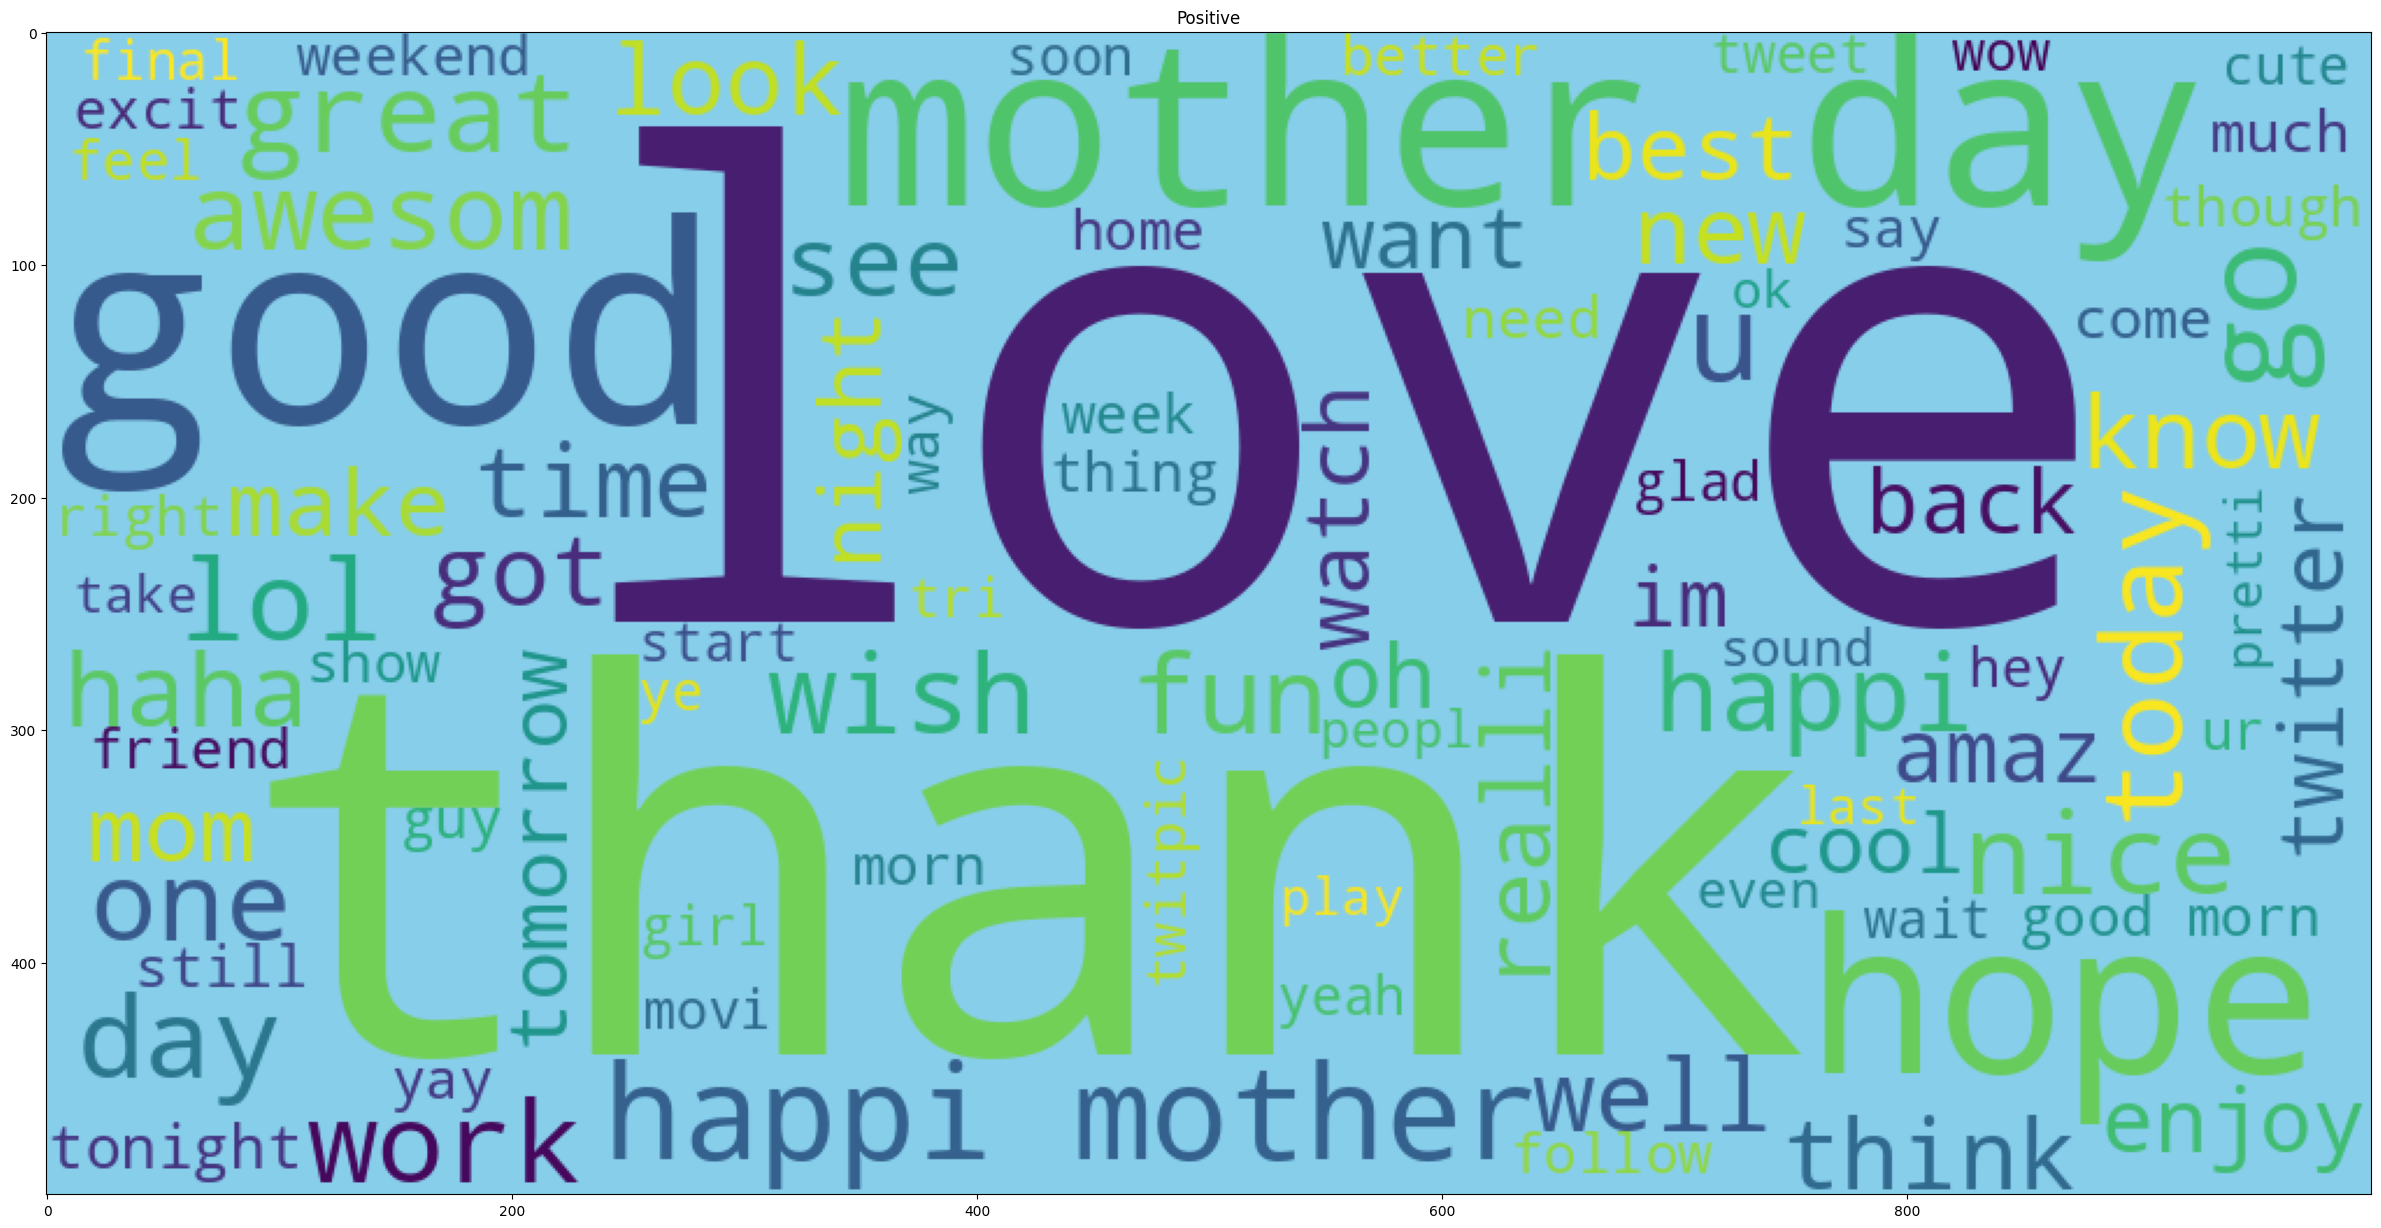

In [27]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

### For Negatives

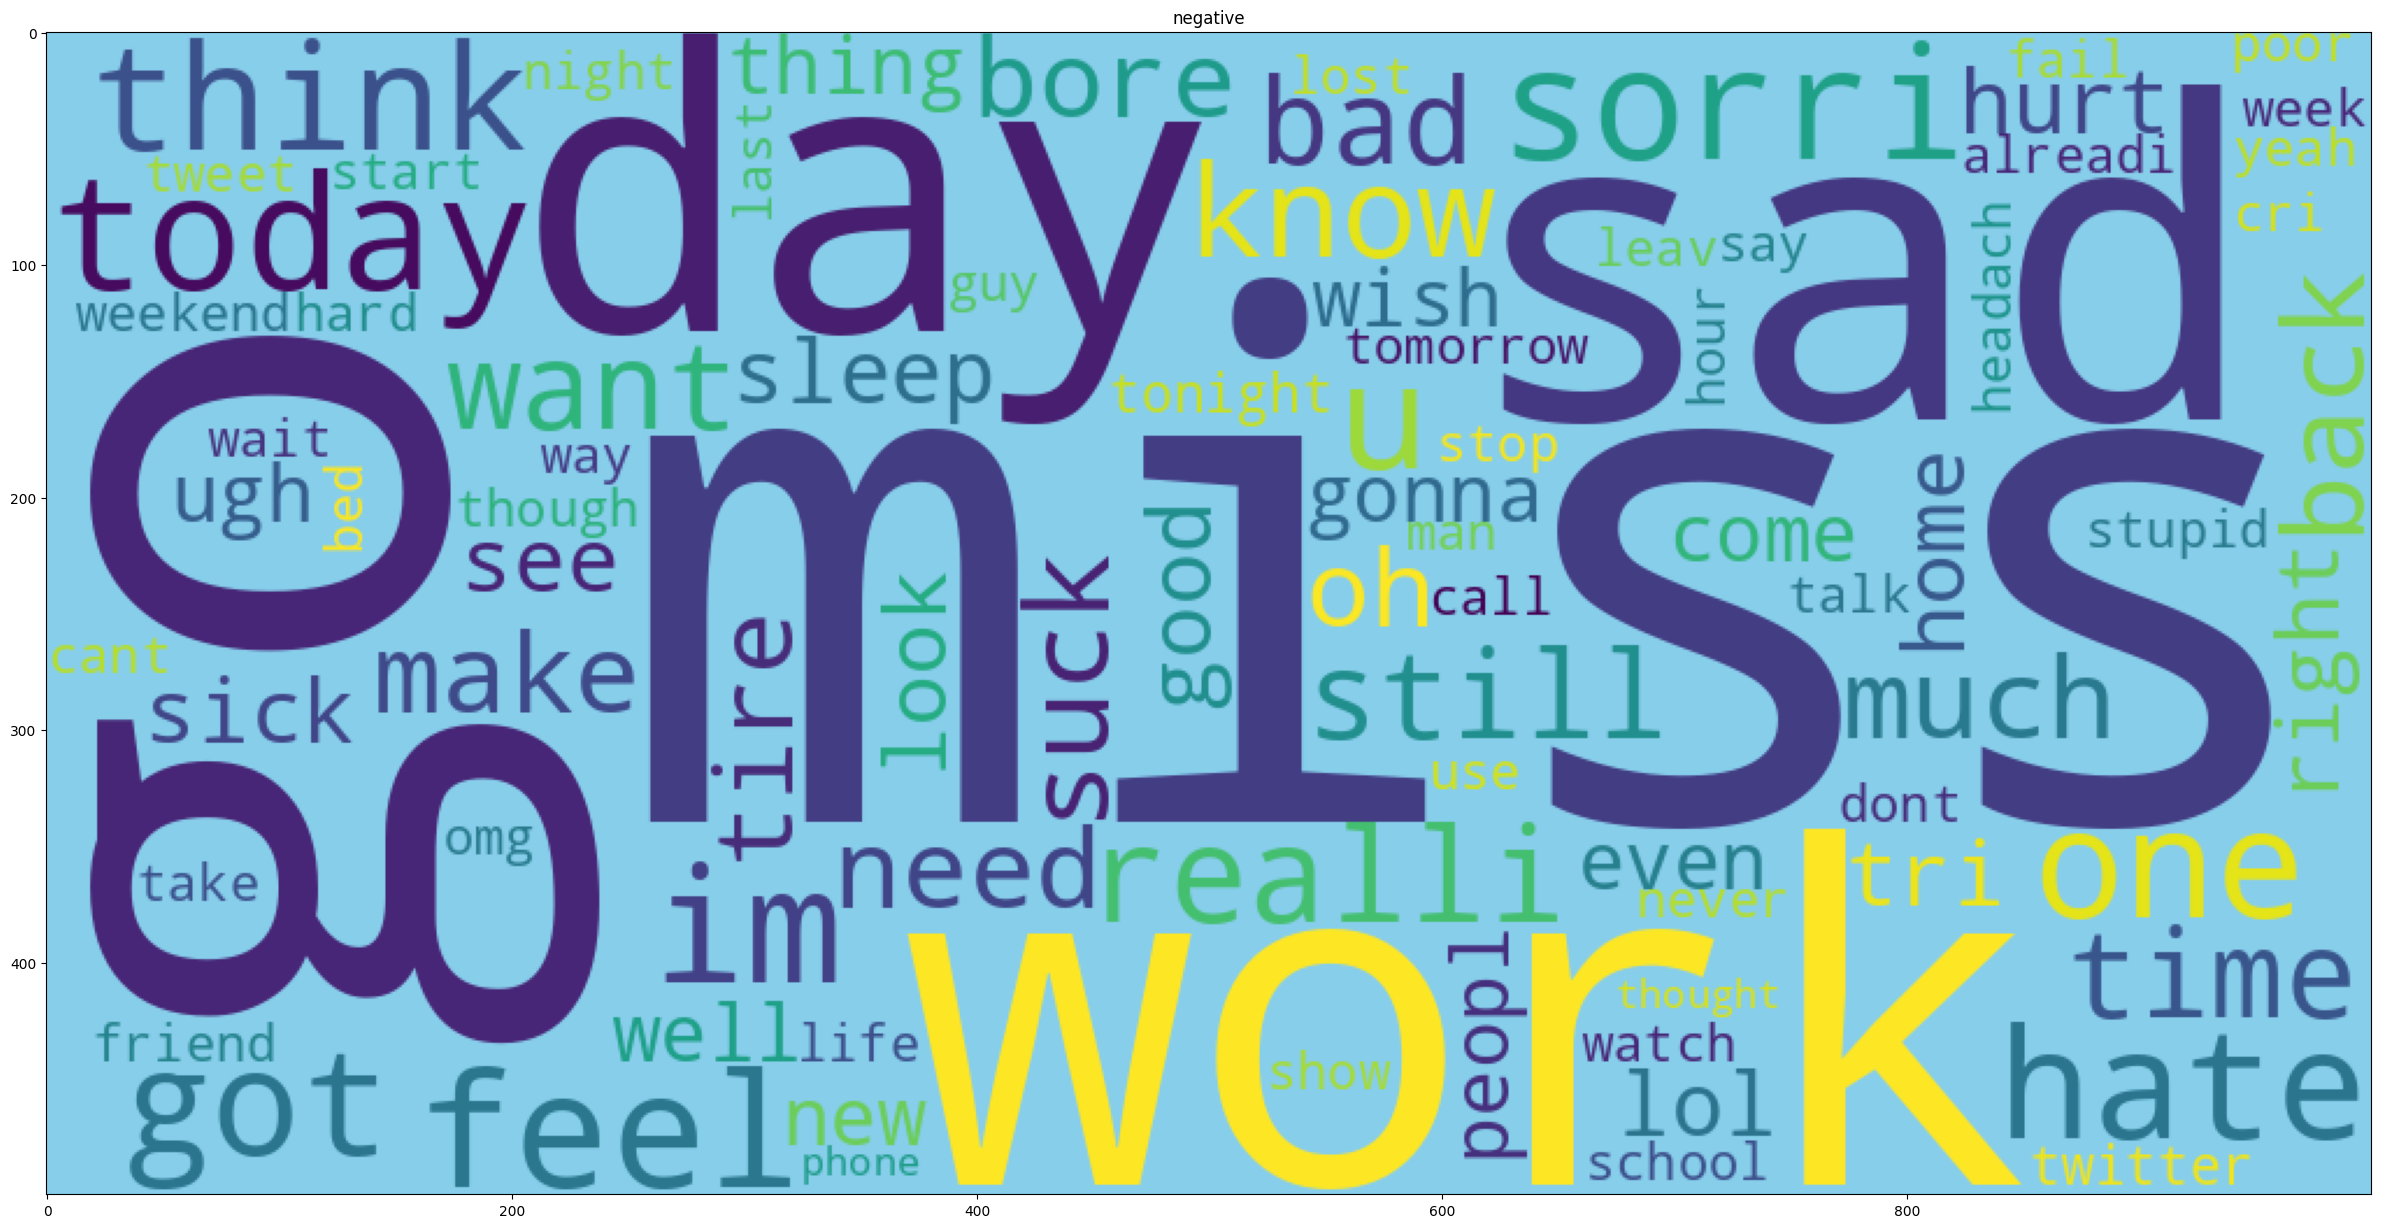

In [28]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

### Model Building

In [29]:
X = data_cleaned['text']
y = data_cleaned['sentiment']

In [30]:
X

0                                               respond go
1                                  sooo sad miss san diego
2                                               boss bulli
3                                      interview leav alon
4                            son put releas alreadi bought
                               ...                        
27475    wish could come see u denver husband lost job ...
27476    wonder rake client made clear net forc dev lea...
27477    yay good enjoy break probabl need hectic weeke...
27478                                                worth
27479                           flirt go atg smile yay hug
Name: text, Length: 27480, dtype: object

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)



In [32]:
# Save the vectorizer using pickle
import pickle

with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfid, vectorizer_file)

print("TfidfVectorizer saved as tfidf_vectorizer.pkl")

TfidfVectorizer saved as tfidf_vectorizer.pkl


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

In [34]:
X_train

<21984x19572 sparse matrix of type '<class 'numpy.float64'>'
	with 150624 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [36]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      1572
           2       0.66      0.74      0.70      2236
           4       0.74      0.76      0.75      1688

    accuracy                           0.70      5496
   macro avg       0.71      0.70      0.70      5496
weighted avg       0.71      0.70      0.70      5496



In [ ]:
# print("X_predict", X_predict.columns)
# print("X_train", X_train.columns)

### Save Model

In [38]:
import pickle

In [ ]:
#Saving the model
pickle.dump(clf, open('rfmodel.pkl','wb'))

In [40]:
# Load the saved Random Forest model
with open("rfmodel.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

In [41]:
# Load the saved Random Forest model
with open("tfidf_vectorizer.pkl", "rb") as model_file:
    loaded_vectorizer = pickle.load(model_file)

In [42]:
input_features = 'as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff'

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfid = TfidfVectorizer()

# transformed_input= tfid.fit_transform(input_features)

In [43]:
# Make predictions using the loaded model
X = loaded_vectorizer.transform([input_features])

In [44]:
X

<1x19572 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [45]:
loaded_model.predict(X)

array([2], dtype=int64)

## __________________________________________________________________________________________________________________________________

### Training the model with complete train data

In [46]:
X_train_csv = data_cleaned['text']
y_train_csv = data_cleaned['sentiment']

In [47]:
X_train_csv

0                                               respond go
1                                  sooo sad miss san diego
2                                               boss bulli
3                                      interview leav alon
4                            son put releas alreadi bought
                               ...                        
27475    wish could come see u denver husband lost job ...
27476    wonder rake client made clear net forc dev lea...
27477    yay good enjoy break probabl need hectic weeke...
27478                                                worth
27479                           flirt go atg smile yay hug
Name: text, Length: 27480, dtype: object

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_x_train = TfidfVectorizer()
X_train_csv_transformed = tfidf_x_train.fit_transform(X_train_csv)

In [49]:
# Save the vectorizer using pickle
import pickle

with open("tfidf_vectorizer_complete_train_data.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_x_train, vectorizer_file)

print("TfidfVectorizer saved as tfidf_vectorizer_complete_train_data.pkl")

TfidfVectorizer saved as tfidf_vectorizer_complete_train_data.pkl


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [51]:
full_data_RFC = RandomForestClassifier()
full_data_RFC.fit(X_train_csv_transformed, y_train_csv)

RandomForestClassifier()

In [52]:
#Saving the model
pickle.dump(full_data_RFC, open('trained_rfmodel.pkl','wb'))

### Test CSV file

In [53]:
test_df = pd.read_csv(r'C:\\Users\prash\Desktop\SIEMENS\SIEMENS_proj_folder\Sentiment_Analysis_Webapp\data\sentiment_data\test.csv',delimiter=',', encoding='ISO-8859-1')
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria
3,01082688c6,happy bday!,positive,morning,46-60,Andorra
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola


In [54]:
test_df.isnull().sum()

textID           0
text             0
sentiment        0
Time of Tweet    0
Age of User      0
Country          0
dtype: int64

In [55]:
#Now Let's drop the columns we don't need!
test_df.drop(['textID', 'Time of Tweet', 'Age of User',
       'Country'], axis=1, inplace=True)
test_df.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [56]:
test_df.drop_duplicates(inplace=True)

In [57]:
test_df['sentiment_Label'] = test_df['sentiment'].apply(sentiment)

In [58]:
test_df = test_df[['sentiment_Label','text']]

In [59]:
#Simplifying the names of columns
test_df.columns = ['sentiment', 'text']

In [60]:
test_df

,sentiment,text
0,2,Last session of the day http://twitpic.com/67ezh
1,4,Shanghai is also really exciting (precisely -...
2,0,"Recession hit Veronique Branquinho, she has to..."
3,4,happy bday!
4,4,http://twitpic.com/4w75p - I like it!!
...,...,...
3529,0,"its at 3 am, im very tired but i can`t sleep ..."
3530,4,All alone in this old house again. Thanks for...
3531,0,I know what you mean. My little dog is sinkin...
3532,4,_sutra what is your next youtube video gonna b...


In [61]:
stuff_to_be_removed = list(stopwords.words('english')) + list(punctuation)
stemmer = LancasterStemmer()
corpus = test_df['text'].tolist()
print(len(corpus))
print(corpus[0])

3534
Last session of the day  http://twitpic.com/67ezh


In [62]:
final_corpus = []
final_corpus_joined = []
for i in test_df.index:
    text = re.sub('[^a-zA-Z]', ' ', test_df['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [63]:
data_cleaned_test = pd.DataFrame()
data_cleaned_test["text"] = final_corpus_joined
data_cleaned_test["sentiment"] = test_df["sentiment"].values

In [64]:
X_test_file = data_cleaned_test['text']
y_test_file = data_cleaned_test['sentiment']

In [65]:
X_test_file

0                   last session day http twitpic com ezh
1       shanghai also realli excit precis skyscrap gal...
2       recess hit veroniqu branquinho quit compani shame
3                                              happi bday
4                               http twitpic com w p like
                              ...                        
3529                                    im tire sleep tri
3530    alon old hous thank net keep aliv kick whoever...
3531    know mean littl dog sink depress want move som...
3532             sutra next youtub video gonna love video
3533          http twitpic com woj omgssh ang cute ng bbi
Name: text, Length: 3534, dtype: object

In [66]:
y_test_file

0       2
1       4
2       0
3       4
4       4
       ..
3529    0
3530    4
3531    0
3532    4
3533    4
Name: sentiment, Length: 3534, dtype: int64

In [72]:
# Load the saved Random Forest model
with open("tfidf_vectorizer_complete_train_data.pkl", "rb") as model_file:
    loaded_vectorizer_test = pickle.load(model_file)

In [74]:
X_test_transfomed = loaded_vectorizer.transform(X_test_file)

In [75]:
X_test_transfomed

<3534x19572 sparse matrix of type '<class 'numpy.float64'>'
	with 22683 stored elements in Compressed Sparse Row format>

In [76]:
preds_x_test = full_data_RFC.predict(X_test_transfomed)

In [77]:
print(classification_report(y_test_file, preds_x_test))

              precision    recall  f1-score   support

           0       0.73      0.64      0.69      1001
           2       0.66      0.73      0.69      1430
           4       0.77      0.76      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.71      0.71      3534
weighted avg       0.72      0.71      0.71      3534

